## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import re
import scipy
from scipy import stats as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## FUNCTIONS

In [2]:
def general_check(df):
    """
    returns a dictionary of columns names, shape of the df, dict with columns as keys and
    number of nulls/columns
    
    Input: DataFrame
    Output:dictionary with nested dict and lists
    """
    general = {"COLNAMES":[c for c in df.columns],"SHAPE":tuple(df.shape), "TYPE":\
               {k:v for k,v in zip([c for c in df.columns],[df[c].dtype for\
                                                            c in [c for c in df.columns]])},
               "NULLS":{k:v for k,v in zip([c for c in df.columns],[df[c].isna().sum() for\
                                                            c in [c for c in df.columns]])}}
    return general


def col_uniques(df):
    """
    returns a dictionary of names of columns as keys and list of unique values of that column
    as values
    
    Input: DataFrame
    Output:dictionary
    """
    uniques = {k:v for k,v in zip([c.upper() for c in df.columns],[df[c].unique() for\
                                                           c in [c for c in df.columns]])}
    return uniques

## IMPORTING FILES

In [3]:
mrg = pd.read_csv("NFA-and-WHI-(2014-2015).csv")
mrg.drop("Unnamed: 0",axis=1,inplace=True)
mrg.head()

,country,region,population,GDP,happiness_rank,happiness_score,standard_error,economy,family,health,...,forest_land_EFProdTot,forest_land_EFNetradeTot,grazing_land_BiocapTot,grazing_land_EFConsTot,grazing_land_EFProdTot,grazing_land_EFNetradeTot,total_BiocapTot,total_EFConsTot,total_EFProdTot,total_EFNetradeTot
0,Afghanistan,Southern Asia,31.628,19300.733976,153,3.575,0.03084,0.31982,0.30285,0.30335,...,1.920868,0.299869,5.914984,5.910276,5.704672,0.205603,15.942686,24.424655,20.419030,4.005625
1,Albania,Central and Eastern Europe,2.890,12755.188400,95,4.959,0.05013,0.87867,0.80434,0.81325,...,0.479454,0.359339,0.631604,0.690471,0.631604,0.058866,3.038634,6.188639,4.111402,2.077236
2,Algeria,Middle East and Northern Africa,38.934,182051.101260,68,5.605,0.05099,0.93929,1.07772,0.61766,...,3.350301,3.389591,10.670903,7.134556,4.894426,2.240130,21.084114,95.340572,63.237726,32.102846
3,Angola,Sub-Saharan Africa,24.228,90796.125960,137,4.033,0.04758,0.75778,0.86040,0.16683,...,2.511559,0.159380,29.787594,2.324783,1.899933,0.424850,55.489126,37.767605,20.801248,16.966357
4,Argentina,Latin America and Caribbean,42.980,443691.136000,30,6.574,0.04612,1.05351,1.24823,0.78723,...,9.433302,1.103335,77.034804,36.212114,43.624836,-7.412722,288.354829,158.584521,244.494779,-85.910257


In [4]:
general_check(mrg)

{'COLNAMES': ['country',
  'region',
  'population',
  'GDP',
  'happiness_rank',
  'happiness_score',
  'standard_error',
  'economy',
  'family',
  'health',
  'freedom',
  'trust',
  'generosity',
  'residual',
  'true_residual',
  'built_up_land_BiocapTot',
  'built_up_land_EFConsTot',
  'built_up_land_EFProdTot',
  'built_up_land_EFNetradeTot',
  'carbon_BiocapTot',
  'carbon_EFConsTot',
  'carbon_EFProdTot',
  'carbon_EFNetradeTot',
  'crop_land_BiocapTot',
  'crop_land_EFConsTot',
  'crop_land_EFProdTot',
  'crop_land_EFNetradeTot',
  'fishing_ground_BiocapTot',
  'fishing_ground_EFConsTot',
  'fishing_ground_EFProdTot',
  'fishing_ground_EFNetradeTot',
  'forest_land_BiocapTot',
  'forest_land_EFConsTot',
  'forest_land_EFProdTot',
  'forest_land_EFNetradeTot',
  'grazing_land_BiocapTot',
  'grazing_land_EFConsTot',
  'grazing_land_EFProdTot',
  'grazing_land_EFNetradeTot',
  'total_BiocapTot',
  'total_EFConsTot',
  'total_EFProdTot',
  'total_EFNetradeTot'],
 'SHAPE': (142, 4

# Q1: Is general happiness level somehow correlated with the level of consumption of natural resources?

## OVERVIEW: HEATMAP

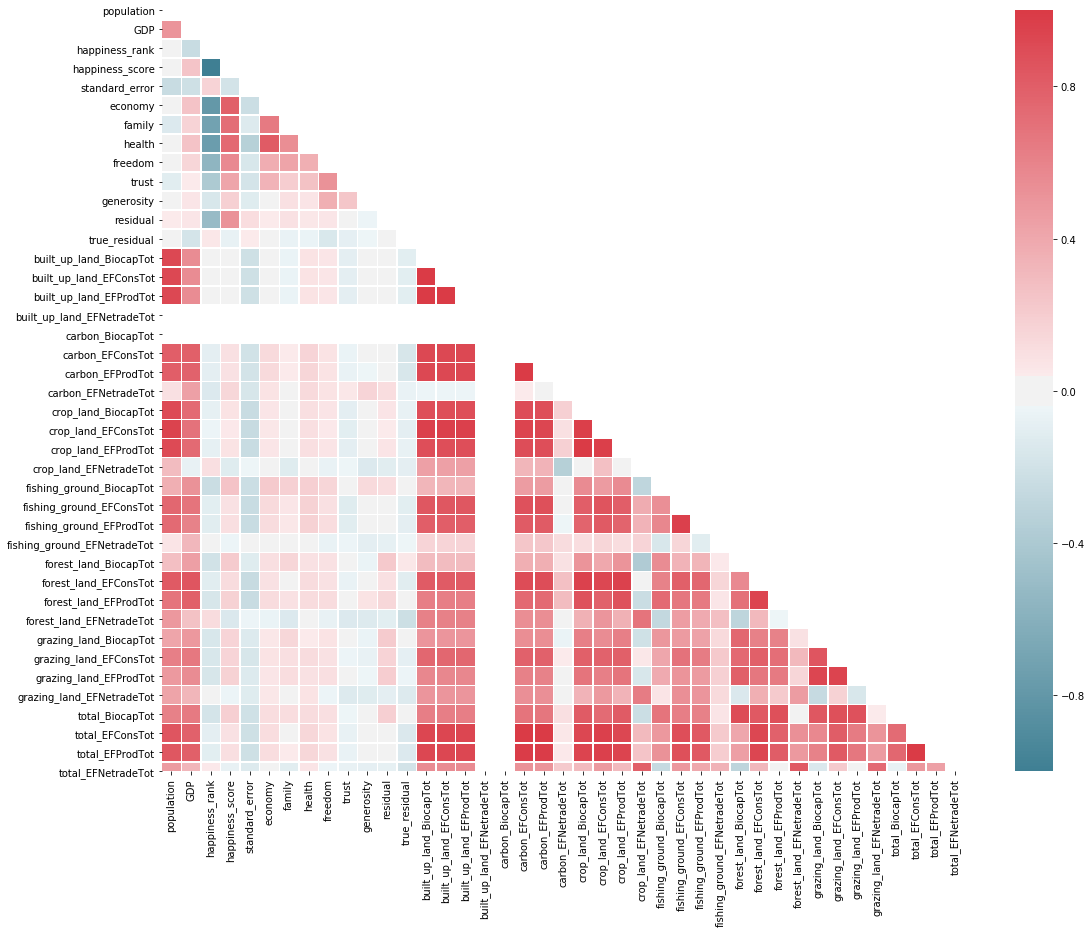

In [5]:
# Compute the correlation matrix
corr = mrg.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=False, linewidths=.5)

In [6]:
"""
It seems that there is not much correlation among the EF and Biocapacity Factors and
the variables from the happiness index. While significant correlations exist within the 2
sets themselves!
"""

'\nIt seems that there is not much correlation among the EF and Biocapacity Factors and\nthe variables from the happiness index. While significant correlations exist within the 2\nsets themselves!\n'

## VISUALIZATION & BINNING

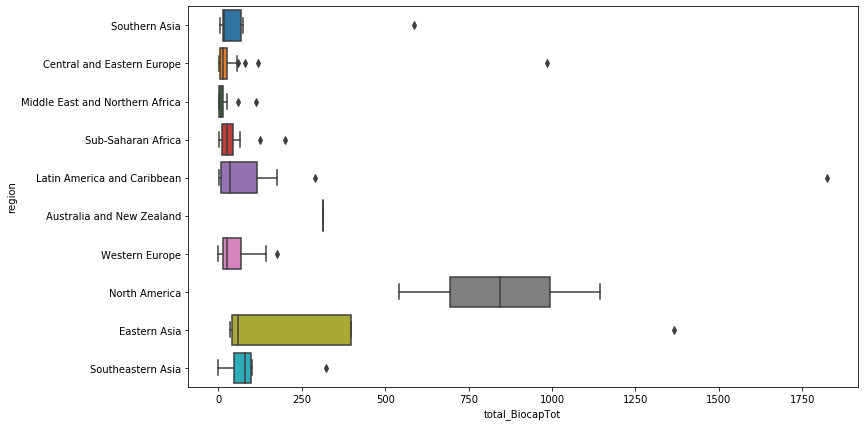

In [7]:
#Very big (China, Russia, USA etc.) countires have an enormous amount of TOT Biocapacity
#that would skew the rest of the data:
plt.figure(figsize=(12,7))
sns.boxplot(x="total_BiocapTot",y="region", data=mrg)


Text(0.5, 1.0, 'Happiness VS Net Trade of Natural Resources')

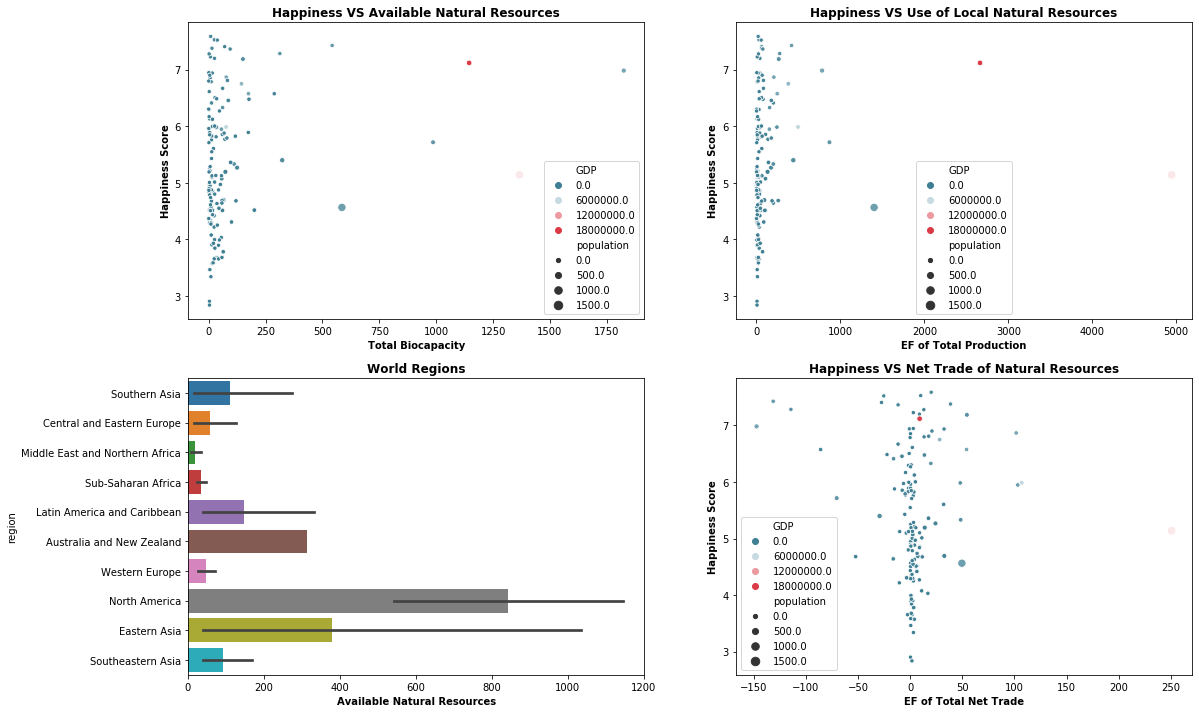

In [8]:
#COLOR based on GDP (RED = Highest), SIZE based on POPULATION

fig,ax = plt.subplots(2,2, figsize=(18,12))

plt.sca(ax[0,0])
#HAPPINESS SCORE VS TOT NATURAL RESOURCES AVAILABLE IN THE COUNTRY
sns.scatterplot(y="happiness_score",x="total_BiocapTot",hue="GDP",size="population",
                data=mrg, palette=cmap)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total Biocapacity", fontweight="heavy")
plt.title("Happiness VS Available Natural Resources",fontweight="heavy")

plt.sca(ax[0,1])
#HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
sns.scatterplot(y="happiness_score",x="total_EFProdTot",hue="GDP",size="population",
                data=mrg, palette=cmap)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("EF of Total Production", fontweight="heavy")
plt.title("Happiness VS Use of Local Natural Resources",fontweight="heavy")

plt.sca(ax[1,0])
#HAPPINESS SCORE VS EF of TOTAL CONSUMPTION OF THE COUNTRY
sns.barplot(x="total_BiocapTot",y="region",data=mrg, orient="h")

plt.xlabel("Available Natural Resources", fontweight="heavy")
plt.title("World Regions",fontweight="heavy")

plt.sca(ax[1,1])
#HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
sns.scatterplot(y="happiness_score",x="total_EFNetradeTot",hue="GDP",size="population",
                data=mrg, palette=cmap)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("EF of Total Net Trade", fontweight="heavy")
plt.title("Happiness VS Net Trade of Natural Resources",fontweight="heavy")

### REGRESSION on HAPPINESS BINS

Text(0.5, 1.0, 'Happiness VS Net Trade of Natural Resources')

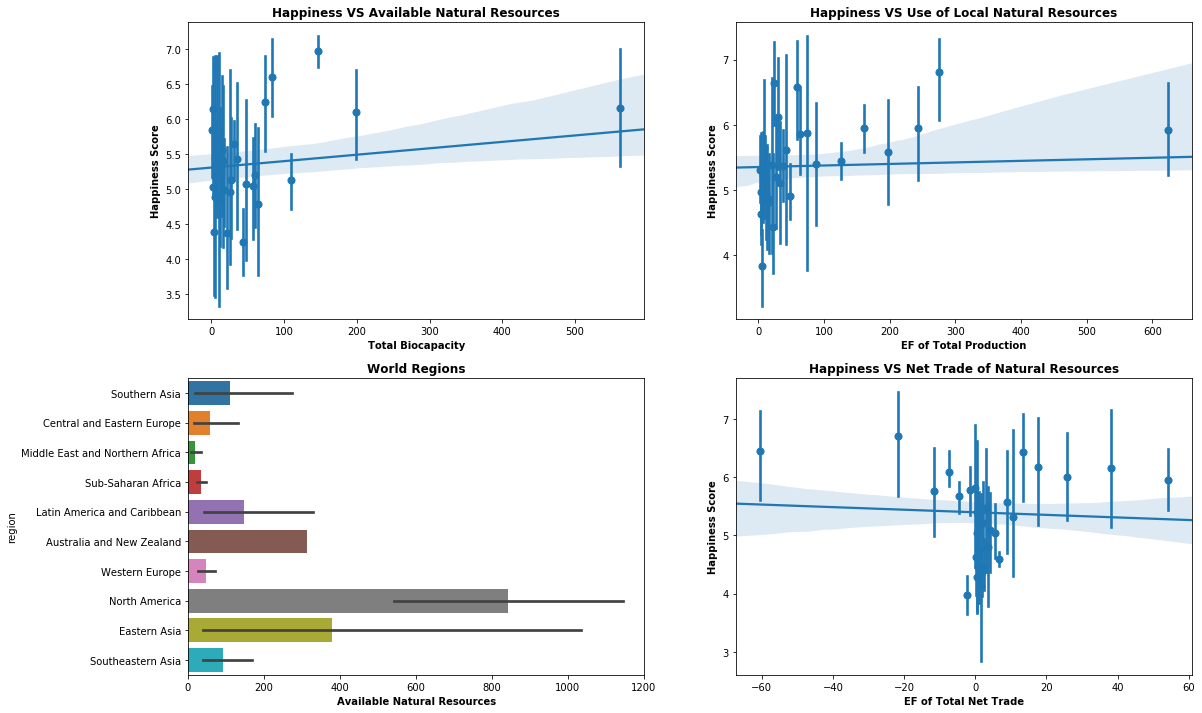

In [9]:
#COLOR based on GDP (RED = Highest), SIZE based on POPULATION

fig,ax = plt.subplots(2,2, figsize=(18,12))

plt.sca(ax[0,0])
#HAPPINESS SCORE VS TOT NATURAL RESOURCES AVAILABLE IN THE COUNTRY
sns.regplot(y="happiness_score",x="total_BiocapTot", data=mrg, x_bins=30)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total Biocapacity", fontweight="heavy")
plt.title("Happiness VS Available Natural Resources",fontweight="heavy")

plt.sca(ax[0,1])
#HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
sns.regplot(y="happiness_score",x="total_EFProdTot",data=mrg, x_bins=30)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("EF of Total Production", fontweight="heavy")
plt.title("Happiness VS Use of Local Natural Resources",fontweight="heavy")

plt.sca(ax[1,0])
#HAPPINESS SCORE VS EF of TOTAL CONSUMPTION OF THE COUNTRY
sns.barplot(x="total_BiocapTot",y="region",data=mrg, orient="h")

plt.xlabel("Available Natural Resources", fontweight="heavy")
plt.title("World Regions",fontweight="heavy")

plt.sca(ax[1,1])
#HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
sns.regplot(y="happiness_score",x="total_EFNetradeTot",data=mrg, x_bins=30)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("EF of Total Net Trade", fontweight="heavy")
plt.title("Happiness VS Net Trade of Natural Resources",fontweight="heavy")

### MANAGE OUTLIERS (BINNING)

In [10]:
avg = mrg["total_BiocapTot"].mean()
med = mrg["total_BiocapTot"].median()
mx = mrg["total_BiocapTot"].max()
mn = mrg["total_BiocapTot"].min()
print(avg)
print(med)
print(mx)
print(mn)

#countries with natural resources >= 3xMEAN
super_big = mrg[mrg["total_BiocapTot"]>= avg*2]
print("LENGTH SUPERBIG:",len(super_big))

#countries with natural resources  MEDIAN <= X <=3xMEAN
big = mrg[(mrg["total_BiocapTot"]>=med) & (mrg["total_BiocapTot"]<avg*2)]
print("LENGTH BIG:",len(big))

#countries with natural resources <= MEDIAN
small = mrg[(mrg["total_BiocapTot"]>avg/10) & (mrg["total_BiocapTot"]<med)]
print("LENGTH SMALL:",len(small))

#countries with natural resources < MEDIAN of SMALL COUNTRIES
super_small = mrg[mrg["total_BiocapTot"]< avg/10]
print("LENGTH SUPERSMALL:",len(super_small))

print("LENGTH CHECK:", len(mrg)-(len(super_big)+len(big)+len(small)+len(super_small)))

85.62669470600986
23.963887205000002
1824.2779649999998
0.2591932193
LENGTH SUPERBIG: 13
LENGTH BIG: 58
LENGTH SMALL: 33
LENGTH SUPERSMALL: 38
LENGTH CHECK: 0


### PLOT DIFFERENT COUNTRY SIZES

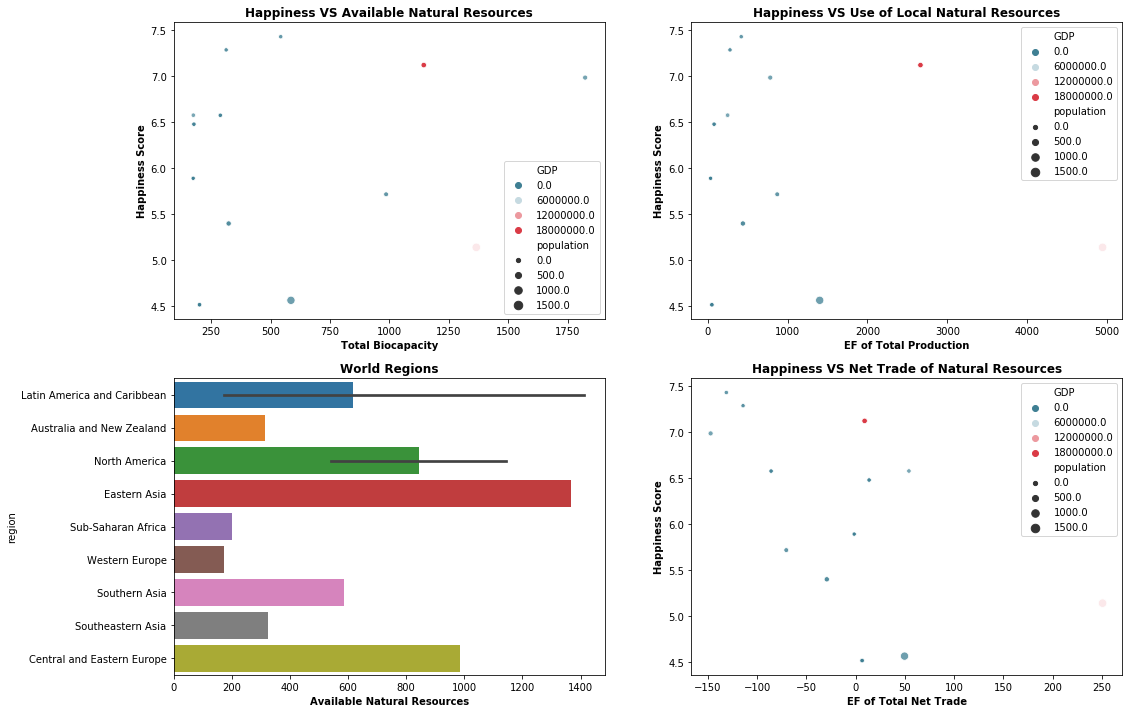

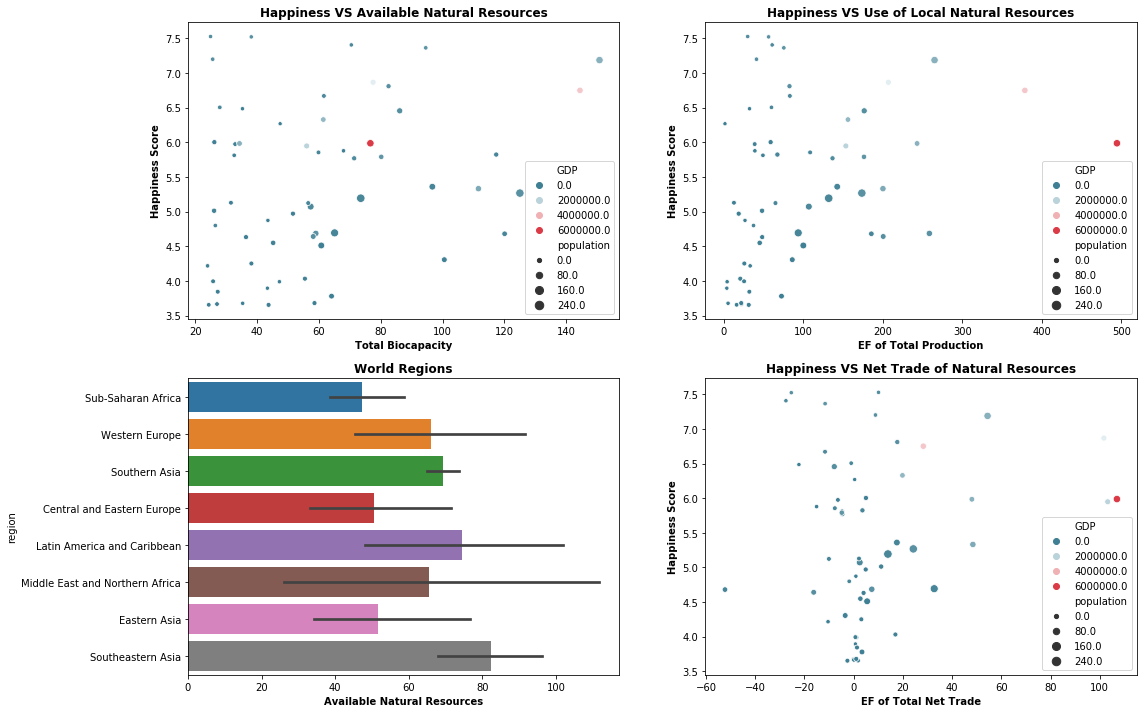

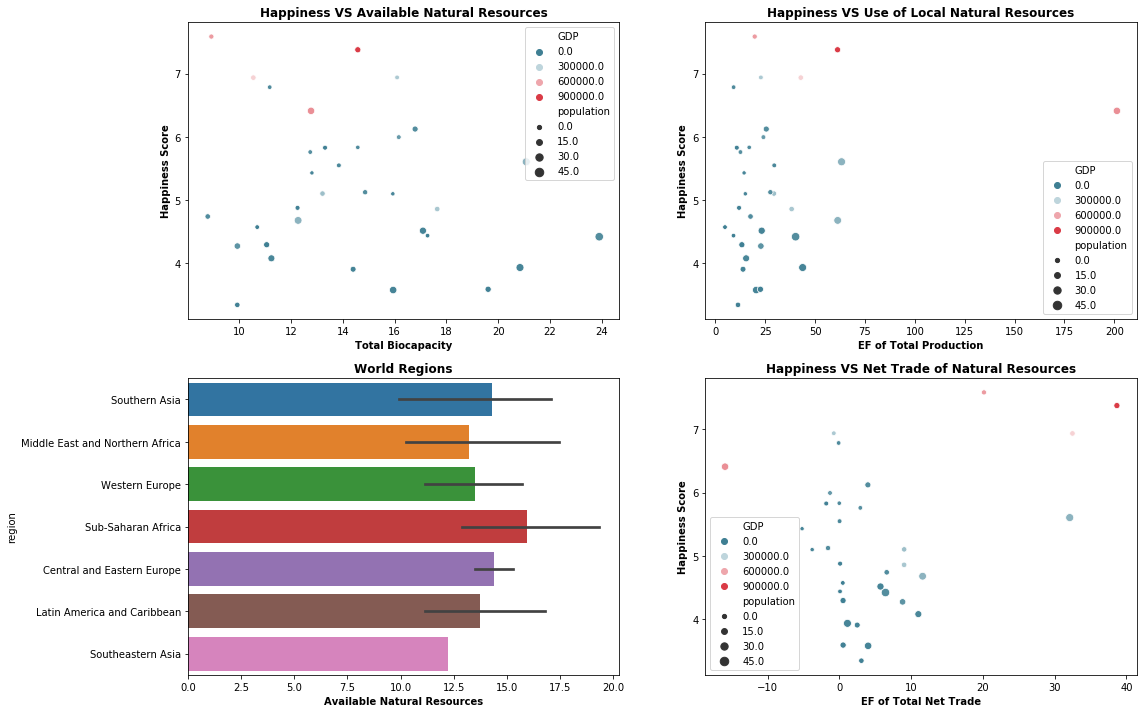

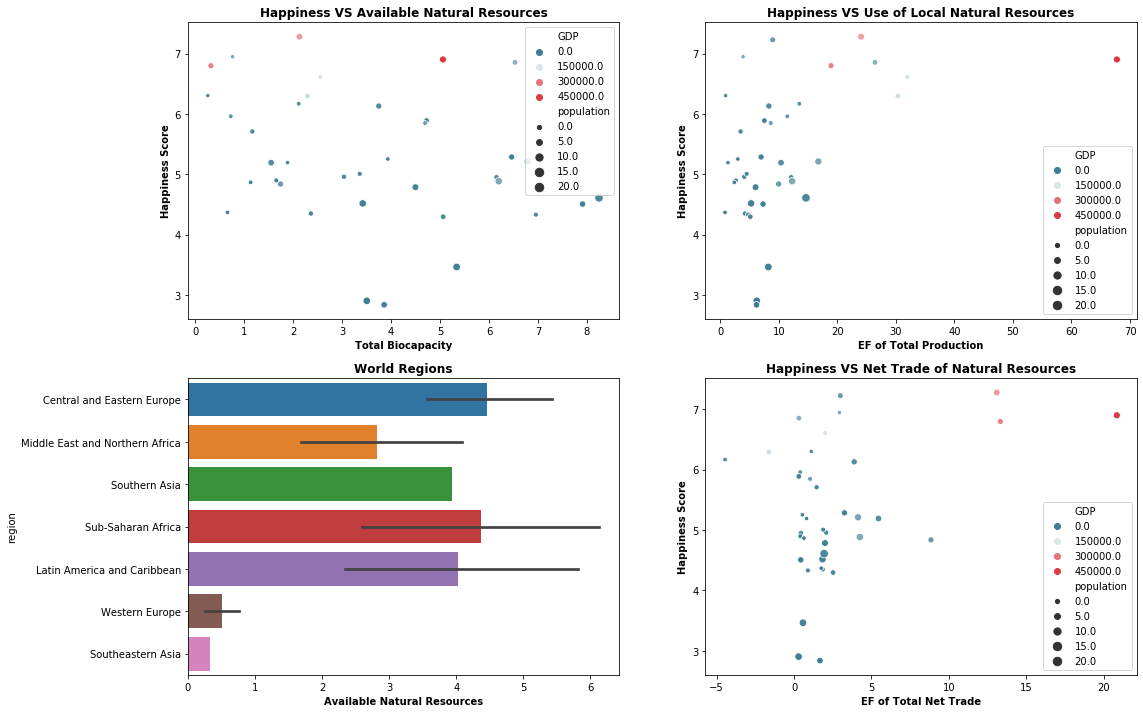

In [11]:
sizes = [super_big,big,small,super_small]
size_lab = ["SUPER-BIG","BIG","SMALL","SUPER-SMALL"]

for s in sizes:
    
    #COLOR based on GDP (RED = Highest), SIZE based on POPULATION
    fig,ax = plt.subplots(2,2, figsize=(17,12))

    plt.sca(ax[0,0])
    #HAPPINESS SCORE VS TOT NATURAL RESOURCES AVAILABLE IN THE COUNTRY
    sns.scatterplot(y="happiness_score",x="total_BiocapTot",hue="GDP",size="population",
                    data=s, palette=cmap)

    plt.ylabel("Happiness Score", fontweight="heavy")
    plt.xlabel("Total Biocapacity", fontweight="heavy")
    plt.title("Happiness VS Available Natural Resources",fontweight="heavy")

    plt.sca(ax[0,1])
    #HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
    sns.scatterplot(y="happiness_score",x="total_EFProdTot",hue="GDP",size="population",
                    data=s, palette=cmap)

    plt.ylabel("Happiness Score", fontweight="heavy")
    plt.xlabel("EF of Total Production", fontweight="heavy")
    plt.title("Happiness VS Use of Local Natural Resources",fontweight="heavy")

    plt.sca(ax[1,0])
    #HAPPINESS SCORE VS EF of TOTAL CONSUMPTION OF THE COUNTRY
    sns.barplot(x="total_BiocapTot",y="region",data=s, orient="h")

    plt.xlabel("Available Natural Resources", fontweight="heavy")
    plt.title("World Regions",fontweight="heavy")

    plt.sca(ax[1,1])
    #HAPPINESS SCORE VS EF of TOTAL USE OF COUNTRY's NATURAL RESOURCES FOR PRODUCTION
    sns.scatterplot(y="happiness_score",x="total_EFNetradeTot",hue="GDP",size="population",
                    data=s, palette=cmap)

    plt.ylabel("Happiness Score", fontweight="heavy")
    plt.xlabel("EF of Total Net Trade", fontweight="heavy")
    plt.title("Happiness VS Net Trade of Natural Resources",fontweight="heavy")

### ... IS THEN MONEY TO MAKE PEOPLE HAPPY?

Text(0.5, 1.0, 'Happiness VS GDP - WORLD')

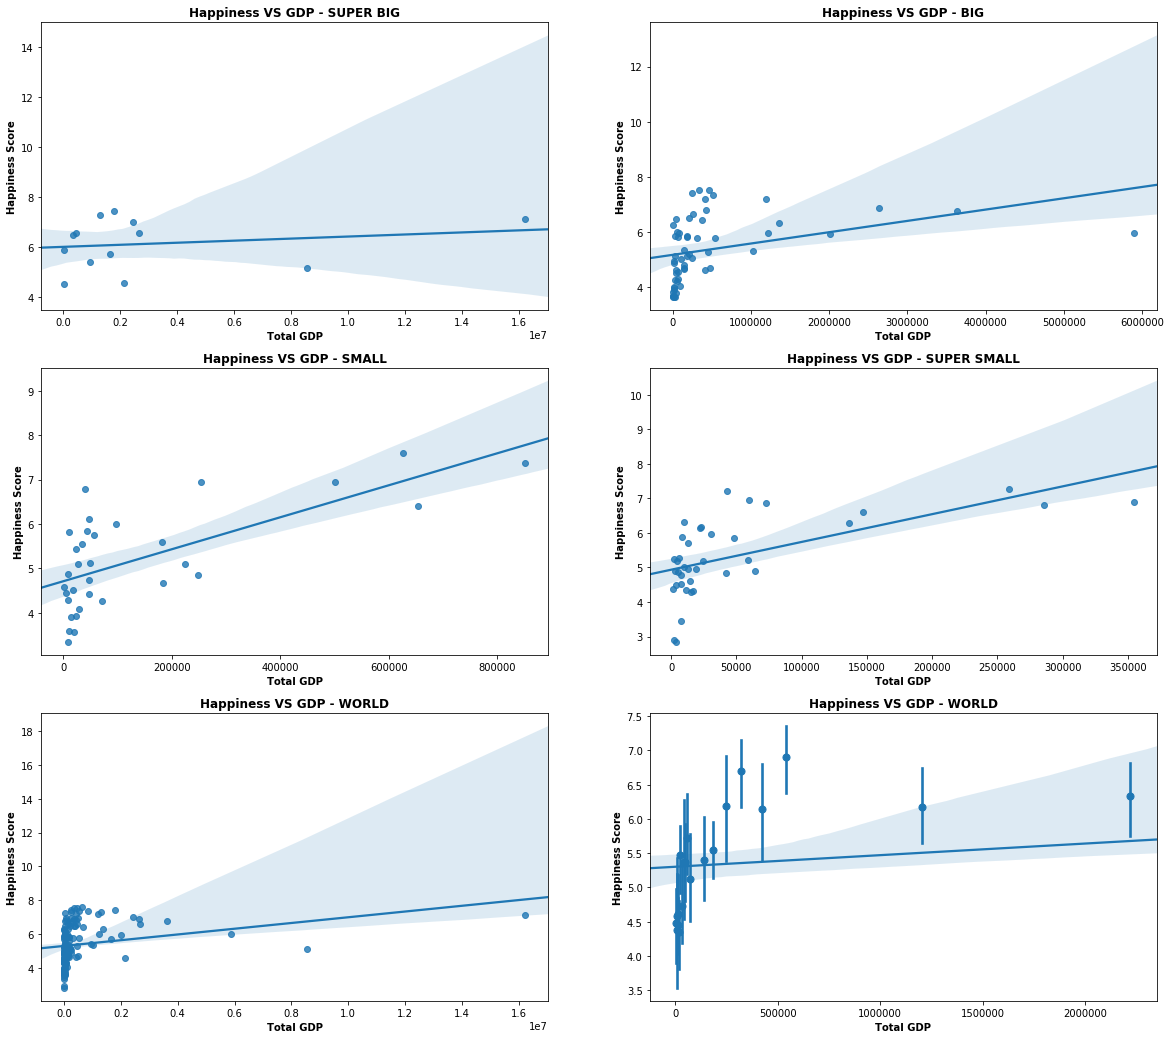

In [12]:
fig,ax = plt.subplots(3,2, figsize=(20,18))

#HAPPINESS SCORE VS TOT GDP OF EACH OF THE 4 COUNTRY BINS
plt.sca(ax[0,0])
sns.regplot(y="happiness_score",x="GDP", data=super_big,)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - SUPER BIG",fontweight="heavy")

plt.sca(ax[0,1])
sns.regplot(y="happiness_score",x="GDP",data=big)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - BIG",fontweight="heavy")

plt.sca(ax[1,0])
sns.regplot(y="happiness_score",x="GDP",data=small)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - SMALL",fontweight="heavy")

plt.sca(ax[1,1])
sns.regplot(y="happiness_score",x="GDP",data=super_small)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - SUPER SMALL",fontweight="heavy")

plt.sca(ax[2,0])
sns.regplot(y="happiness_score",x="GDP",data=mrg)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - WORLD",fontweight="heavy")

plt.sca(ax[2,1])
sns.regplot(y="happiness_score",x="GDP",data=mrg,x_bins=20)

plt.ylabel("Happiness Score", fontweight="heavy")
plt.xlabel("Total GDP", fontweight="heavy")
plt.title("Happiness VS GDP - WORLD",fontweight="heavy")

### IS GDP DEPENDING ON NATURAL RESOURCES AND THEIR CONSUMPTION?

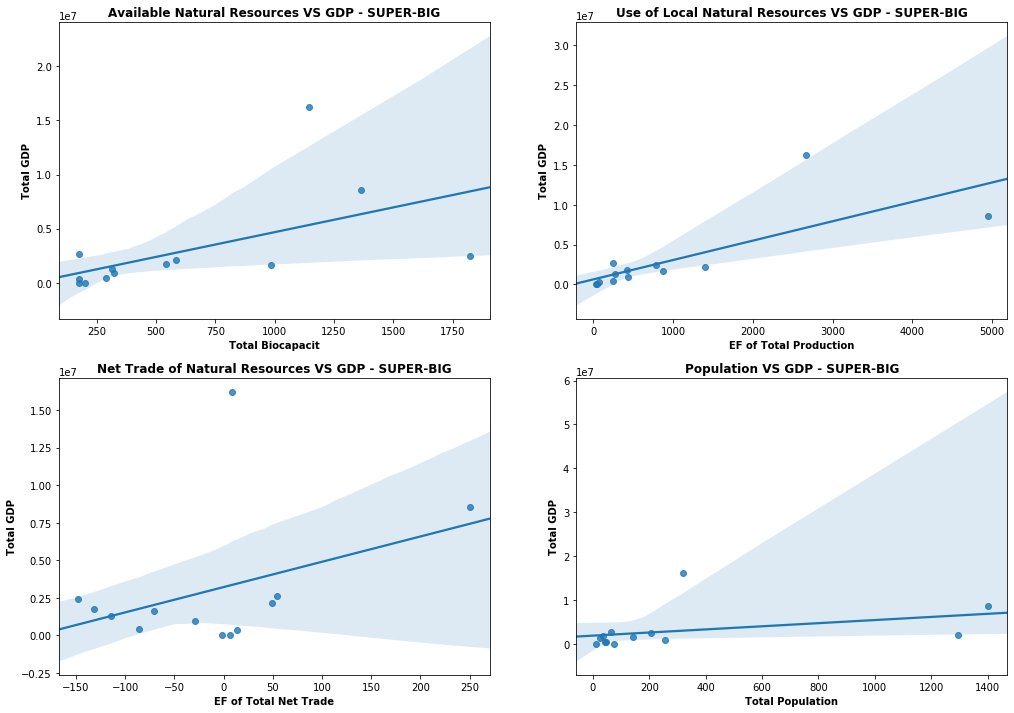

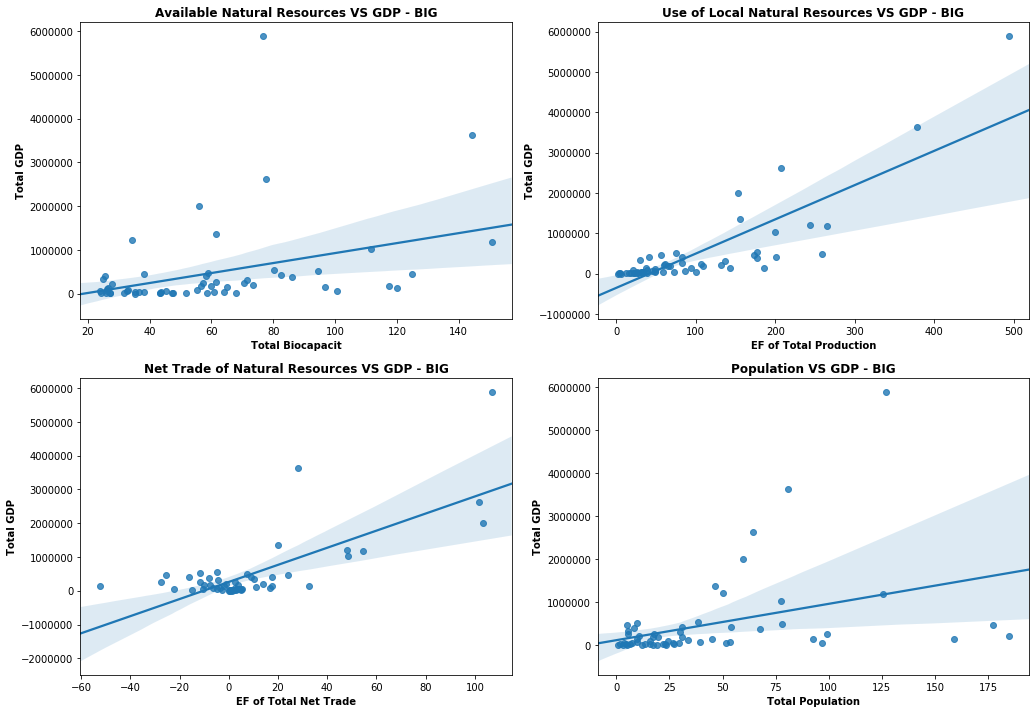

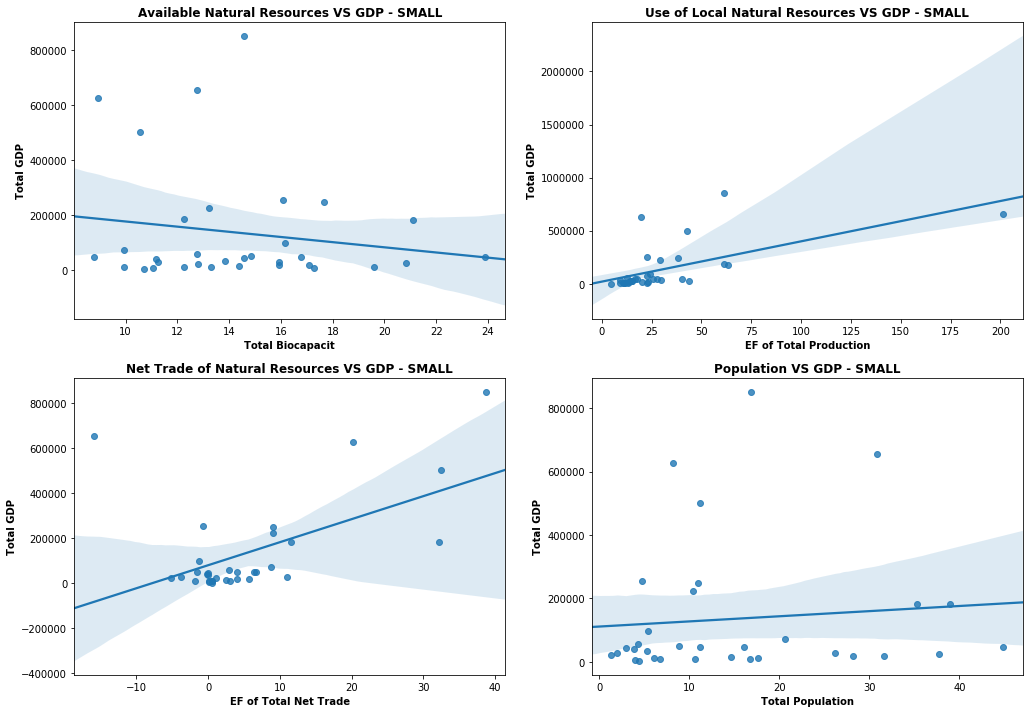

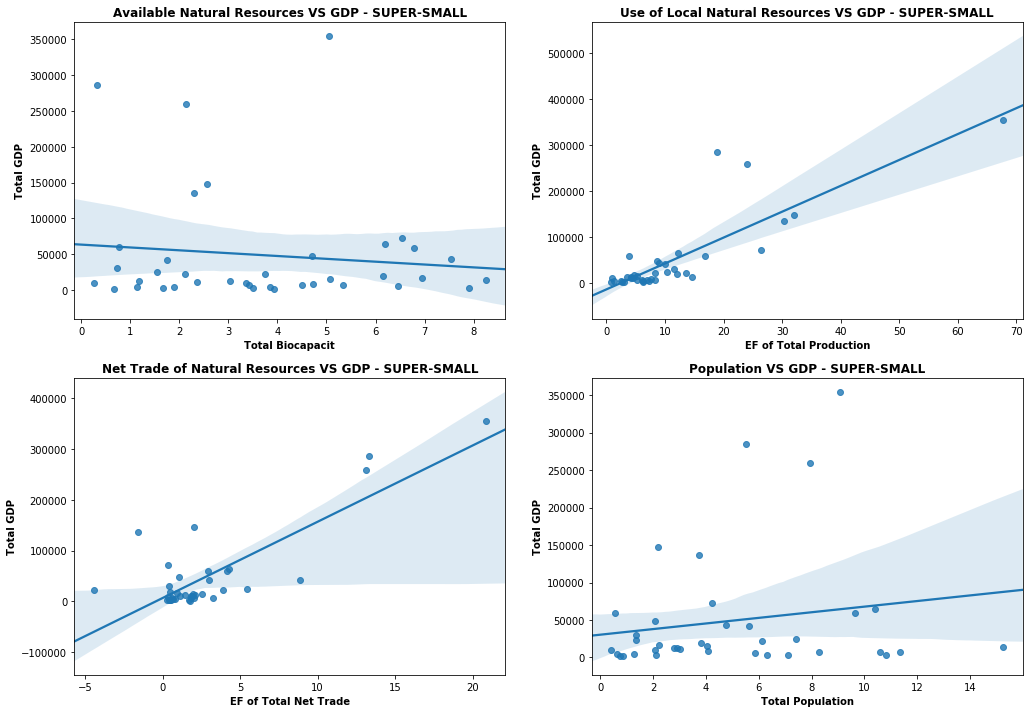

In [13]:
for s,lb in zip(sizes,size_lab):
        
    fig,ax = plt.subplots(2,2, figsize=(17,12))

    #BIOCAP, EFProd & EFNetrade VS TOT GDP OF EACH OF THE 4 COUNTRY BINS
    plt.sca(ax[0,0])
    sns.regplot(x="total_BiocapTot",y="GDP", data=s)

    plt.xlabel("Total Biocapacit", fontweight="heavy")
    plt.ylabel("Total GDP", fontweight="heavy")
    plt.title("Available Natural Resources VS GDP - "+lb,fontweight="heavy")

    plt.sca(ax[0,1])
    sns.regplot(x="total_EFProdTot",y="GDP",data=s)

    plt.xlabel("EF of Total Production", fontweight="heavy")
    plt.ylabel("Total GDP", fontweight="heavy")
    plt.title("Use of Local Natural Resources VS GDP - "+lb,fontweight="heavy")

    plt.sca(ax[1,0])
    sns.regplot(x="total_EFNetradeTot",y="GDP",data=s)

    plt.xlabel("EF of Total Net Trade", fontweight="heavy")
    plt.ylabel("Total GDP", fontweight="heavy")
    plt.title("Net Trade of Natural Resources VS GDP - "+lb,fontweight="heavy")

    plt.sca(ax[1,1])
    sns.regplot(x="population",y="GDP",data=s)

    plt.xlabel("Total Population", fontweight="heavy")
    plt.ylabel("Total GDP", fontweight="heavy")
    plt.title("Population VS GDP - "+lb,fontweight="heavy")

## CHECK GDP VS NATURAL RESOURCES FILTERING FOR OUTLIERS (CHINA,USA, ETC)

Text(0.5, 1.0, 'Population VS GDP - WORLD')

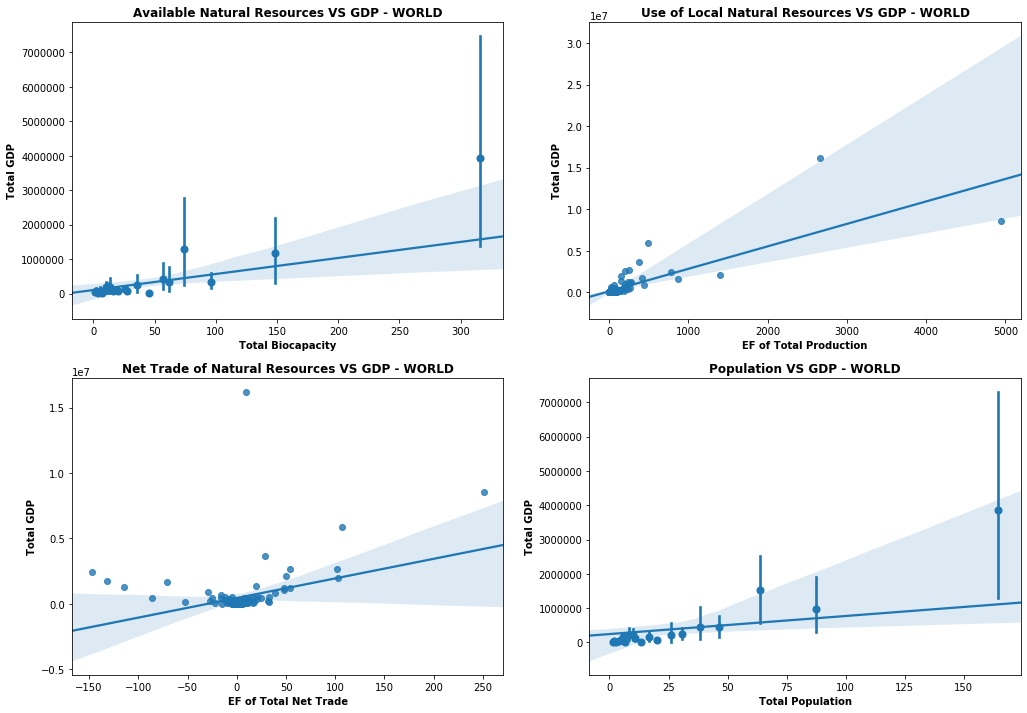

In [14]:
# PLOT WORLD WITH BINS FOR NATURAL RESOURCES & POP
fig,ax = plt.subplots(2,2, figsize=(17,12))

#BIOCAP, EFProd & EFNetrade VS TOT GDP OF EACH OF THE 4 COUNTRY BINS
plt.sca(ax[0,0])
sns.regplot(x="total_BiocapTot",y="GDP", data=mrg, x_bins=20)

plt.xlabel("Total Biocapacity", fontweight="heavy")
plt.ylabel("Total GDP", fontweight="heavy")
plt.title("Available Natural Resources VS GDP - WORLD",fontweight="heavy")

plt.sca(ax[0,1])
sns.regplot(x="total_EFProdTot",y="GDP",data=mrg)#, x_bins=20)

plt.xlabel("EF of Total Production", fontweight="heavy")
plt.ylabel("Total GDP", fontweight="heavy")
plt.title("Use of Local Natural Resources VS GDP - WORLD",fontweight="heavy")

plt.sca(ax[1,0])
sns.regplot(x="total_EFNetradeTot",y="GDP",data=mrg)#, x_bins=20)

plt.xlabel("EF of Total Net Trade", fontweight="heavy")
plt.ylabel("Total GDP", fontweight="heavy")
plt.title("Net Trade of Natural Resources VS GDP - WORLD",fontweight="heavy")

plt.sca(ax[1,1])
sns.regplot(x="population",y="GDP",data=mrg, x_bins=20)

plt.xlabel("Total Population", fontweight="heavy")
plt.ylabel("Total GDP", fontweight="heavy")
plt.title("Population VS GDP - WORLD",fontweight="heavy")

### HOW ARE NATURAL RESOURCES, THEIR CONSUMPTION AND HAPPINESS DISTRIBUTED?

Text(0.5, 1.0, 'WORLD Net Trade of Natural Resources')

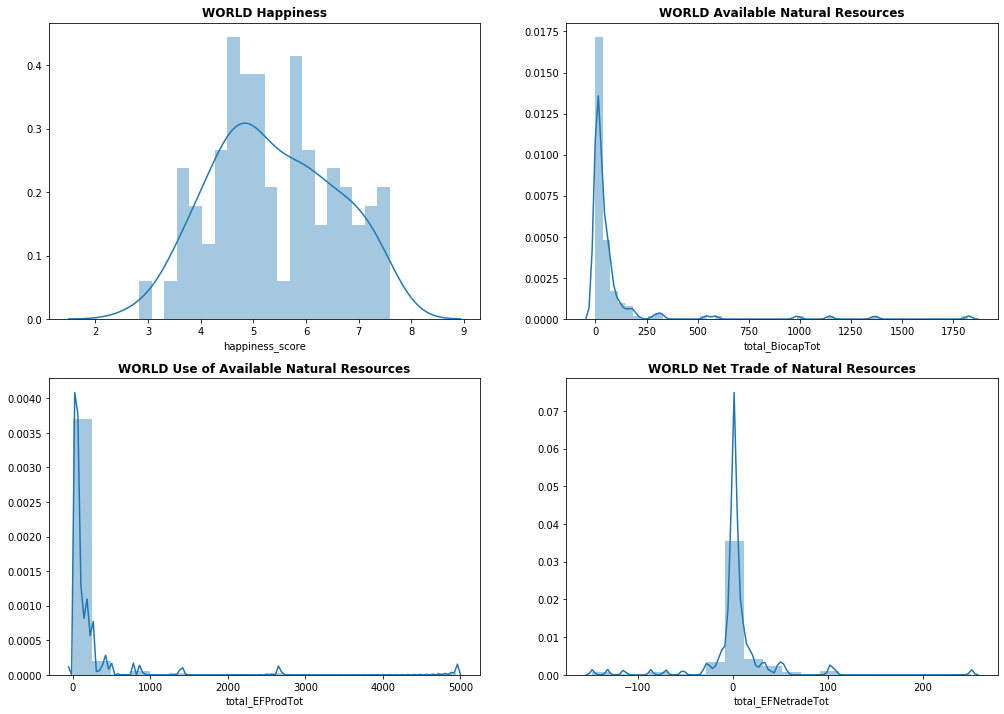

In [15]:
fig,ax = plt.subplots(2,2, figsize=(17,12))


plt.sca(ax[0,0])
sns.distplot(mrg["happiness_score"],bins=20)
plt.title("WORLD Happiness",fontweight="heavy")

plt.sca(ax[0,1])
sns.distplot(mrg["total_BiocapTot"])#,bins=20)
plt.title("WORLD Available Natural Resources",fontweight="heavy")

plt.sca(ax[1,0])
sns.distplot(mrg["total_EFProdTot"],bins=20)
plt.title("WORLD Use of Available Natural Resources",fontweight="heavy")

plt.sca(ax[1,1])
sns.distplot(mrg["total_EFNetradeTot"],bins=20)
plt.title("WORLD Net Trade of Natural Resources",fontweight="heavy")

### PLOT FOR DIFFERENT COUNTRY SIZES

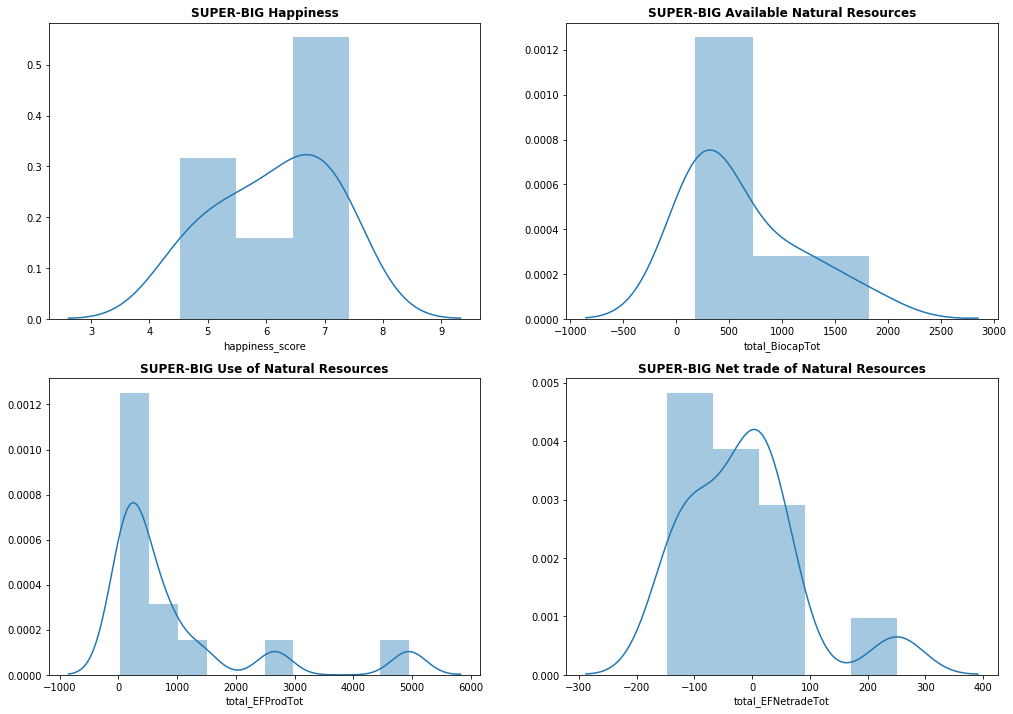

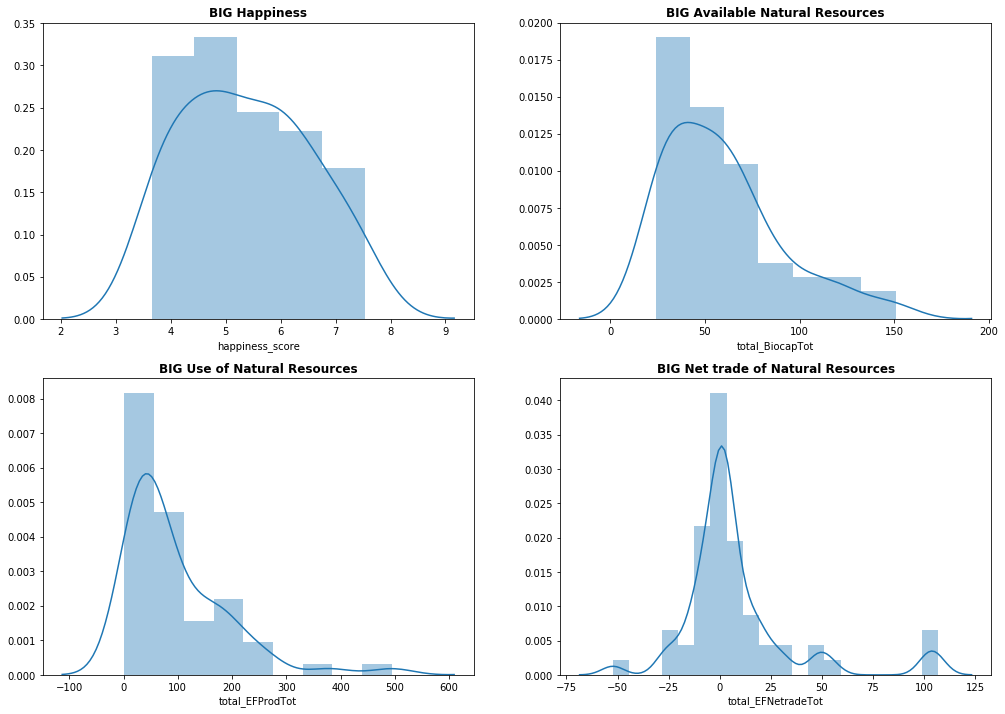

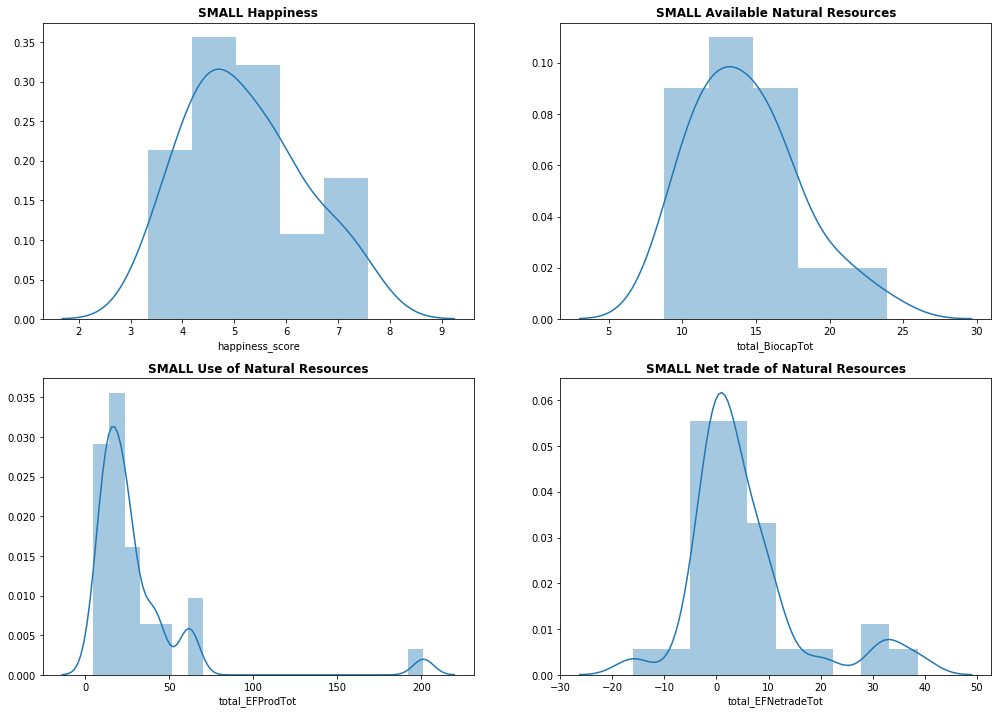

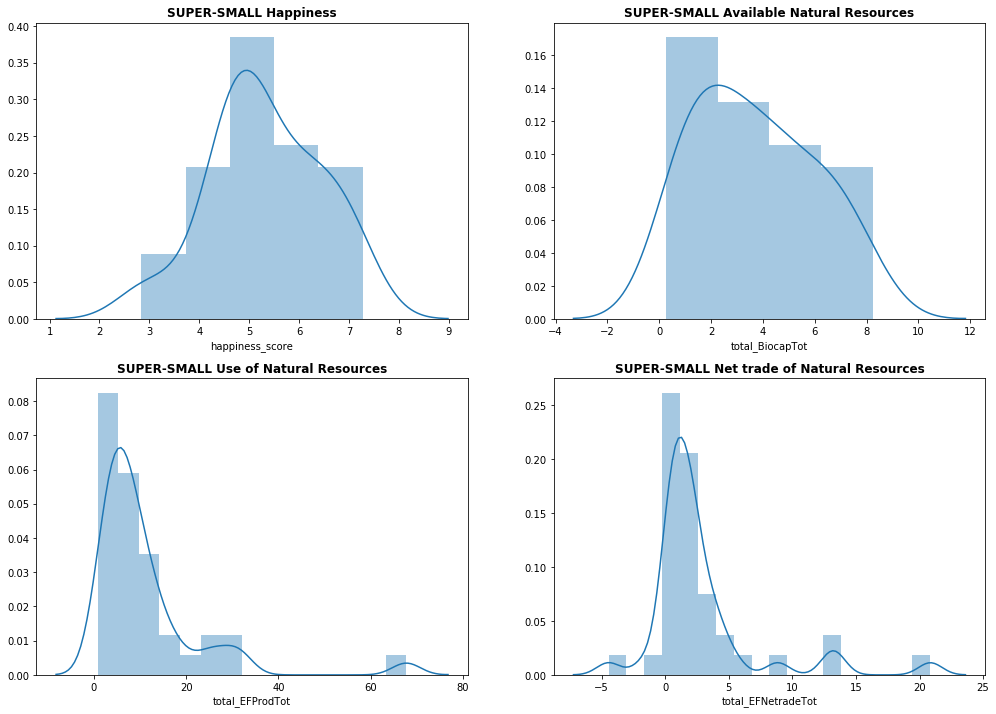

In [16]:
# BINS AUTOMATICALLY GENERATED

for s,lb in zip(sizes,size_lab):
    fig,ax = plt.subplots(2,2, figsize=(17,12))

    plt.sca(ax[0,0])
    sns.distplot(s["happiness_score"])
    plt.title(lb+" Happiness",fontweight="heavy")

    plt.sca(ax[0,1])
    sns.distplot(s["total_BiocapTot"])
    plt.title(lb+" Available Natural Resources",fontweight="heavy")

    plt.sca(ax[1,0])
    sns.distplot(s["total_EFProdTot"])
    plt.title(lb+" Use of Natural Resources",fontweight="heavy")

    plt.sca(ax[1,1])
    sns.distplot(s["total_EFNetradeTot"])
    plt.title(lb+" Net trade of Natural Resources",fontweight="heavy")
    
    plt.show()



## COMPUTE ECOLOGICAL RESERVE/DEFICIT

In [17]:
text = ["built_up_land","carbon","crop_land","fishing_ground","forest_land","grazing_land","total"]

for t in text:
    mrg[t + "_eco_res/def"] = mrg[t + "_BiocapTot"]-\
    (mrg[t + "_EFProdTot"]+mrg[t + "_EFNetradeTot"])


## AGGREGATED FIGURES

In [18]:
#group by World Region the analyzed factors
reg = mrg.groupby(by="region").agg({"GDP":"mean","population":"sum","happiness_score":"mean",
                                    "total_BiocapTot":"sum","total_EFProdTot":"sum",
                                    "total_EFNetradeTot":"sum","total_eco_res/def":"sum"})
#SORT BY AVERAGE HAPPINESS SCORE
reg.sort_values(by="happiness_score",ascending=False,inplace=True)

#COMPUTE ECOLOGICAL RESEVE/DEFICIT TO COMPARE WITH HAPPINESS
print(reg["total_eco_res/def"].sum())
print(reg["total_BiocapTot"].sum())
reg

-7838.437271264899
12158.990648253399


,GDP,population,happiness_score,total_BiocapTot,total_EFProdTot,total_EFNetradeTot,total_eco_res/def
region,,,,,,,
Australia and New Zealand,1.284902e+06,23.622,7.284000,313.020660,277.052675,-114.394816,150.362801
North America,9.002102e+06,355.037,7.273000,1687.524958,3081.340295,-122.342811,-1271.472526
Western Europe,9.469692e+05,413.070,6.752056,850.161750,1626.022005,374.225733,-1150.085988
Latin America and Caribbean,2.738186e+05,600.519,6.209286,3125.338693,1845.450221,-188.317315,1468.205788
Middle East and Northern Africa,2.363980e+05,373.573,5.654313,285.465392,1078.290183,161.714200,-954.538990
Southeastern Asia,2.985330e+05,609.278,5.504750,748.111135,1118.673825,-11.750213,-358.812476
Eastern Asia,3.919054e+06,1580.381,5.496250,1520.525192,5709.945228,406.640689,-4596.060725
Central and Eastern Europe,1.340765e+05,407.138,5.323786,1590.302562,1861.079052,-146.792149,-123.984341
Southern Asia,3.711336e+05,1720.601,4.580857,771.217749,1696.322247,115.329934,-1040.434432


# Q2: How are Happiness and Natural Resources and their consumption distributed around the World?

## NORMALIZE DATA

In [24]:
# ONLY NATURAL RESOURCES NORMALIZED TO UNIFORM SCALE WITH HAPPINESS INDEX

mrg_copy = mrg
for col in mrg.columns[15:]:
    mrg_copy[col].apply(np.log)
mrg_copy.head()

,country,region,population,GDP,happiness_rank,happiness_score,standard_error,economy,family,health,...,total_EFConsTot,total_EFProdTot,total_EFNetradeTot,built_up_land_eco_res/def,carbon_eco_res/def,crop_land_eco_res/def,fishing_ground_eco_res/def,forest_land_eco_res/def,grazing_land_eco_res/def,total_eco_res/def
0,Afghanistan,Southern Asia,31.628,19300.733976,153,3.575,0.03084,0.31982,0.30285,0.30335,...,24.424655,20.419030,4.005625,0.0,-4.898568,-1.968060,-0.007836,-1.612214,0.004709,-8.481969
1,Albania,Central and Eastern Europe,2.890,12755.188400,95,4.959,0.05013,0.87867,0.80434,0.81325,...,6.188639,4.111402,2.077236,0.0,-2.592727,-0.735955,0.163593,0.073950,-0.058866,-3.150004
2,Algeria,Middle East and Northern Africa,38.934,182051.101260,68,5.605,0.05099,0.93929,1.07772,0.61766,...,95.340572,63.237726,32.102846,0.0,-57.085923,-14.787848,-0.279904,-5.639131,3.536347,-74.256458
3,Angola,Sub-Saharan Africa,24.228,90796.125960,137,4.033,0.04758,0.75778,0.86040,0.16683,...,37.767605,20.801248,16.966357,0.0,-18.762274,-3.236503,1.860771,10.396717,27.462811,17.721521
4,Argentina,Latin America and Caribbean,42.980,443691.136000,30,6.574,0.04612,1.05351,1.24823,0.78723,...,158.584521,244.494779,-85.910257,0.0,-55.059475,62.731400,65.558516,15.717178,40.822689,129.770308


## CHECK FOR NORMAL DISTRIBUTION

In [25]:
#ALL RELEVANT COLUMNS
columns = ["GDP","population","happiness_score"]+[i for i in mrg.columns[7:-1]]

In [26]:
yes_normal = []
non_normal = []

for col in columns:
    n = mrg_copy[col].size
    fit_mean = np.mean(mrg_copy[col])
    fit_std = np.std(mrg_copy[col])
    normal = st.norm(loc=fit_mean, scale=fit_std)
    ks = st.kstest(mrg_copy[col], normal.cdf)
    if ks[1] < 0.05:
        non_normal.append(col)
    else:
        yes_normal.append(col)
yes_normal

/home/mattia/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1804: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/mattia/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/mattia/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/mattia/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


['happiness_score',
 'economy',
 'family',
 'freedom',
 'generosity',
 'residual',
 'true_residual',
 'built_up_land_EFNetradeTot',
 'carbon_BiocapTot',
 'built_up_land_eco_res/def']

## CHECK FOR EXPONENTIAL DISTRIBUTION

In [27]:
yes_expon = []
non_expon = []

for col in columns:
    n = mrg_copy[col].size
    fit_mean = np.mean(mrg_copy[col])
    fit_std = np.std(mrg_copy[col])
    exponential = st.expon(loc=fit_mean, scale=fit_std)
    ks = st.kstest(mrg_copy[col], exponential.cdf)
    if ks[1] < 0.05:
        non_expon.append(col)
    else:
        yes_expon.append(col)
yes_expon

['built_up_land_EFNetradeTot', 'carbon_BiocapTot', 'built_up_land_eco_res/def']

# Q3 Does culture plays a role in the Happiness level?

## COMPOSITION OF WORLD HAPPINESS INDEX

Text(0.5, 1.0, 'Components of World Happiens Index')

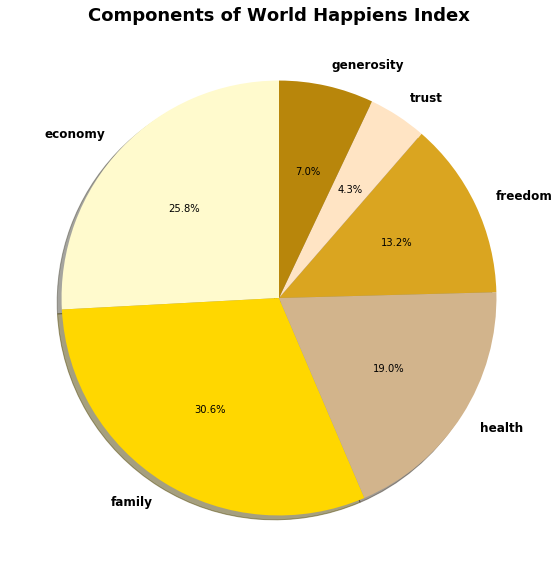

In [28]:
#EXTRACT WORLD AVERAGE SCORES FOR EACH COMPONENT OF THE INDEX 

plt.figure(figsize=(10,10))

c = ["lemonchiffon","gold","tan","goldenrod","bisque","darkgoldenrod"]

_,texts,autotexts = plt.pie([mrg[i].mean() for i in mrg.columns[7:13]],
        labels=[i for i in mrg.columns[7:13]],colors = c, autopct = '%1.1f%%',
                            shadow=True, startangle=90)
for text in texts:
    text.set_size(12)
    text.set_fontweight("heavy")
plt.title("Components of World Happiens Index",fontweight='heavy', size=18)

## CULTURAL FACTORS?... FILTER BY CONTINENT

In [29]:
asia = mrg_copy[(mrg_copy["region"] == "Southern Asia")|(mrg_copy["region"] == "Eastern Asia")|
           (mrg_copy["region"] == "Southeastern Asia")|(mrg_copy["region"] == "Eastern Asia")]

europe = mrg_copy[(mrg_copy["region"] == "Western Europe")|(mrg_copy["region"] == "Central and Eastern Europe")]

noram_ocn = mrg_copy[(mrg_copy["region"] == "North America")|(mrg_copy["region"] == "Australia and New Zealand")]

latam = mrg_copy[(mrg_copy["region"] == "Latin America and Caribbean")]

africa = mrg_copy[(mrg_copy["region"] == "Middle East and Northern Africa")|(mrg_copy["region"] == "Sub-Saharan Africa")]


## ANOVA (95% confidence)

In [30]:
#CHECK FOR HOMOSKEDASTICITY
for col in yes_normal:
    print(np.std(mrg_copy[col]))

1.1376925420229178
0.4039356954472115
0.27560712656790437
0.14840312809831271
0.12362530794522085
0.5297707150073407
0.0002820082007189652
0.0
0.0
0.0


In [31]:
#APPLY ONLY TO COLUMNS TESTED TO BE NORMAL WITH KS... HAPPINESS_SCORE EXCLUDED BASED ON ABOVE 
yes_normal_hsk = yes_normal[1:] #other cols stdev tollerated

diff = []
same = []
for col in yes_normal_hsk:
    anova = st.f_oneway(asia[col],europe[col],noram_ocn[col],latam[col],africa[col])
    if anova[1] < 0.05:
        diff.append(col)
    if anova[1] >= 0.05:
        same.append(col)

/home/mattia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


In [32]:
print(same)
print(diff)

['true_residual']
['economy', 'family', 'freedom', 'generosity', 'residual']


## CREATE DICTIONARY TO EXTRACT TOP 10 countries

In [33]:
#each key is a column in cols each value is a relative dataset ordered by the highest value 
# of that columns downwards

cols = ["happiness_score"]+diff[:-1]
relevant = [mrg.sort_values(by=col,ascending=False)[["country",
                                                     "region",
                                                     "GDP","population",
                                                     "carbon_eco_res/def",
                                                     "forest_land_BiocapTot",
                                                     "total_eco_res/def"]][:10] for col in cols]

top_10 = {k:v for k,v in zip(cols,relevant)} 

In [34]:
print(cols)

['happiness_score', 'economy', 'family', 'freedom', 'generosity']


In [35]:
top_10["happiness_score"]

,country,region,GDP,population,carbon_eco_res/def,forest_land_BiocapTot,total_eco_res/def
121,Switzerland,Western Europe,6.274099e+05,8.211,-28.589249,5.923884,-30.907374
35,Denmark,Western Europe,3.356458e+05,5.647,-19.065055,1.911868,-15.256470
94,Norway,Western Europe,4.595877e+05,5.148,-14.342048,17.993378,7.098285
23,Canada,North America,1.781784e+06,35.588,-190.807789,314.949984,256.224253
42,Finland,Western Europe,2.479119e+05,5.480,-21.998989,51.934298,37.098325
90,Netherlands,Western Europe,8.517868e+05,16.868,-65.031112,1.316090,-85.339413
120,Sweden,Western Europe,5.197111e+05,9.703,-31.573626,62.804034,30.585732
6,Australia,Australia and New Zealand,1.284902e+06,23.622,-111.026858,46.180471,150.362801
58,Israel,Middle East and Northern Africa,2.592981e+05,7.939,-25.040734,0.255068,-35.023720
31,Costa Rica,Latin America and Caribbean,4.319036e+04,4.758,-5.040415,3.071691,-4.404677


In [36]:
print(top_10["happiness_score"].groupby("region").agg({"GDP":"count",
                                                       "carbon_eco_res/def":"sum",
                                                       "forest_land_BiocapTot":"sum",
                                                       "total_eco_res/def":"sum"}))
print("\n")
print("Carbon:",top_10["happiness_score"]["carbon_eco_res/def"].sum()/mrg["carbon_eco_res/def"].sum())
print("Forest Land:",top_10["happiness_score"]["forest_land_BiocapTot"].sum()/mrg["forest_land_BiocapTot"].sum())
print("Total:",top_10["happiness_score"]["total_eco_res/def"].sum()/mrg["total_eco_res/def"].sum())

                                 GDP  carbon_eco_res/def  \
region                                                     
Australia and New Zealand          1         -111.026858   
Latin America and Caribbean        1           -5.040415   
Middle East and Northern Africa    1          -25.040734   
North America                      1         -190.807789   
Western Europe                     6         -180.600079   

                                 forest_land_BiocapTot  total_eco_res/def  
region                                                                     
Australia and New Zealand                    46.180471         150.362801  
Latin America and Caribbean                   3.071691          -4.404677  
Middle East and Northern Africa               0.255068         -35.023720  
North America                               314.949984         256.224253  
Western Europe                              141.883552         -56.720914  


Carbon: 0.04305217907929729
Forest Land: 0.10

In [37]:
top_10["family"]

,country,region,GDP,population,carbon_eco_res/def,forest_land_BiocapTot,total_eco_res/def
57,Ireland,Western Europe,2.549151e+05,4.675,-12.083064,2.318189,-5.909437
35,Denmark,Western Europe,3.356458e+05,5.647,-19.065055,1.911868,-15.256470
121,Switzerland,Western Europe,6.274099e+05,8.211,-28.589249,5.923884,-30.907374
136,Uzbekistan,Central and Eastern Europe,5.141012e+04,29.470,-36.314254,1.658455,-37.758352
94,Norway,Western Europe,4.595877e+05,5.148,-14.342048,17.993378,7.098285
23,Canada,North America,1.781784e+06,35.588,-190.807789,314.949984,256.224253
42,Finland,Western Europe,2.479119e+05,5.480,-21.998989,51.934298,37.098325
115,Spain,Western Europe,1.364503e+06,46.260,-101.228001,15.595510,-114.625416
6,Australia,Australia and New Zealand,1.284902e+06,23.622,-111.026858,46.180471,150.362801
98,Paraguay,Latin America and Caribbean,2.465180e+04,6.553,-2.945916,35.268209,43.879603


In [38]:
print(top_10["family"].groupby("region").agg({"GDP":"count",
                                                       "carbon_eco_res/def":"sum",
                                                       "forest_land_BiocapTot":"sum",
                                                       "total_eco_res/def":"sum"}))
print("\n")
print("Carbon:",top_10["family"]["carbon_eco_res/def"].sum()/mrg["carbon_eco_res/def"].sum())
print("Forest Land:",top_10["family"]["forest_land_BiocapTot"].sum()/mrg["forest_land_BiocapTot"].sum())
print("Total:",top_10["family"]["total_eco_res/def"].sum()/mrg["total_eco_res/def"].sum())

                             GDP  carbon_eco_res/def  forest_land_BiocapTot  \
region                                                                        
Australia and New Zealand      1         -111.026858              46.180471   
Central and Eastern Europe     1          -36.314254               1.658455   
Latin America and Caribbean    1           -2.945916              35.268209   
North America                  1         -190.807789             314.949984   
Western Europe                 6         -197.306407              95.677127   

                             total_eco_res/def  
region                                          
Australia and New Zealand           150.362801  
Central and Eastern Europe          -37.758352  
Latin America and Caribbean          43.879603  
North America                       256.224253  
Western Europe                     -122.502086  


Carbon: 0.04522659109225987
Forest Land: 0.09822514213980049
Total: -0.03702347930624812


In [39]:
top_10["freedom"]

,country,region,GDP,population,carbon_eco_res/def,forest_land_BiocapTot,total_eco_res/def
94,Norway,Western Europe,4.595877e+05,5.148,-14.342048,17.993378,7.098285
121,Switzerland,Western Europe,6.274099e+05,8.211,-28.589249,5.923884,-30.907374
120,Sweden,Western Europe,5.197111e+05,9.703,-31.573626,62.804034,30.585732
136,Uzbekistan,Central and Eastern Europe,5.141012e+04,29.470,-36.314254,1.658455,-37.758352
6,Australia,Australia and New Zealand,1.284902e+06,23.622,-111.026858,46.180471,150.362801
35,Denmark,Western Europe,3.356458e+05,5.647,-19.065055,1.911868,-15.256470
42,Finland,Western Europe,2.479119e+05,5.480,-21.998989,51.934298,37.098325
132,United Arab Emirates,Middle East and Northern Africa,3.546666e+05,9.086,-71.357141,0.604279,-83.553487
103,Qatar,Middle East and Northern Africa,1.474814e+05,2.172,-31.308406,0.000000,-31.444004
31,Costa Rica,Latin America and Caribbean,4.319036e+04,4.758,-5.040415,3.071691,-4.404677


In [40]:
print(top_10["freedom"].groupby("region").agg({"GDP":"count",
                                                       "carbon_eco_res/def":"sum",
                                                       "forest_land_BiocapTot":"sum",
                                                       "total_eco_res/def":"sum"}))
print("\n")
print("Carbon:",top_10["freedom"]["carbon_eco_res/def"].sum()/mrg["carbon_eco_res/def"].sum())
print("Forest Land:",top_10["freedom"]["forest_land_BiocapTot"].sum()/mrg["forest_land_BiocapTot"].sum())
print("Total:",top_10["freedom"]["total_eco_res/def"].sum()/mrg["total_eco_res/def"].sum())

                                 GDP  carbon_eco_res/def  \
region                                                     
Australia and New Zealand          1         -111.026858   
Central and Eastern Europe         1          -36.314254   
Latin America and Caribbean        1           -5.040415   
Middle East and Northern Africa    2         -102.665547   
Western Europe                     5         -115.568968   

                                 forest_land_BiocapTot  total_eco_res/def  
region                                                                     
Australia and New Zealand                    46.180471         150.362801  
Central and Eastern Europe                    1.658455         -37.758352  
Latin America and Caribbean                   3.071691          -4.404677  
Middle East and Northern Africa               0.604279        -114.997491  
Western Europe                              140.567462          28.618499  


Carbon: 0.031132358998509198
Forest Land: 0.0

In [42]:
top_10["generosity"]

,country,region,GDP,population,carbon_eco_res/def,forest_land_BiocapTot,total_eco_res/def
88,Myanmar,Southeastern Asia,6.765765e+04,53.437,-9.649392,28.340611,17.792571
124,Thailand,Southeastern Asia,3.785680e+05,67.726,-96.387351,13.146892,-82.677445
133,United Kingdom,Western Europe,2.631698e+06,64.331,-192.751280,7.859615,-231.217201
80,Malta,Western Europe,1.006552e+04,0.418,-1.230915,0.000313,-1.782864
54,Indonesia,Southeastern Asia,9.396870e+05,254.455,-155.844311,72.330977,-85.760129
14,Bhutan,Southern Asia,1.912699e+03,0.765,-0.647734,3.248005,0.388039
90,Netherlands,Western Europe,8.517868e+05,16.868,-65.031112,1.316090,-85.339413
51,Haiti,Latin America and Caribbean,7.704662e+03,10.572,-1.445898,0.082879,-3.694996
57,Ireland,Western Europe,2.549151e+05,4.675,-12.083064,2.318189,-5.909437
23,Canada,North America,1.781784e+06,35.588,-190.807789,314.949984,256.224253


In [43]:
print(top_10["generosity"].groupby("region").agg({"GDP":"count",
                                                       "carbon_eco_res/def":"sum",
                                                       "forest_land_BiocapTot":"sum",
                                                       "total_eco_res/def":"sum"}))
print("\n")
print("Carbon:",top_10["generosity"]["carbon_eco_res/def"].sum()/mrg["carbon_eco_res/def"].sum())
print("Forest Land:",top_10["generosity"]["forest_land_BiocapTot"].sum()/mrg["forest_land_BiocapTot"].sum())
print("Total:",top_10["generosity"]["total_eco_res/def"].sum()/mrg["total_eco_res/def"].sum())

                             GDP  carbon_eco_res/def  forest_land_BiocapTot  \
region                                                                        
Latin America and Caribbean    1           -1.445898               0.082879   
North America                  1         -190.807789             314.949984   
Southeastern Asia              3         -261.881054             113.818480   
Southern Asia                  1           -0.647734               3.248005   
Western Europe                 4         -271.096371              11.494207   

                             total_eco_res/def  
region                                          
Latin America and Caribbean          -3.694996  
North America                       256.224253  
Southeastern Asia                  -150.645003  
Southern Asia                         0.388039  
Western Europe                     -324.248914  


Carbon: 0.06097502072453191
Forest Land: 0.08824998531008811
Total: 0.02831898916863811
